# Sales Performance Report

### Objectives

##### To analyze sales performance of retail store

Including metrics :

1. Overall performance by year and by sub category product

2. Burn Rate

3. Customer acquisition and Customer Retention

In [1]:
import pandas as pd

data = pd.read_csv('D:\Projects\dqlab_sales_store_.csv')
data.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed MacIntyre,2010-Oct-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-Oct-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-Jul-10,30,9931519,0.08,794522,Technology,Telephones and Communication
3,515,Order Finished,Carlos Soltero,2010-Aug-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-Jun-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


In [2]:
print('\nInfo dataset:')
print(data.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              5499 non-null   int64  
 1   order_status          5499 non-null   object 
 2   customer              5498 non-null   object 
 3   order_date            5499 non-null   object 
 4   order_quantity        5499 non-null   int64  
 5   sales                 5499 non-null   int64  
 6   discount              5499 non-null   float64
 7   discount_value        5499 non-null   int64  
 8   product_category      5499 non-null   object 
 9   product_sub_category  5499 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.7+ KB
None


In [3]:
data['order_date'] = pd.to_datetime(data['order_date'])

print('\nInfo dataset:')
print(data.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5499 non-null   int64         
 1   order_status          5499 non-null   object        
 2   customer              5498 non-null   object        
 3   order_date            5499 non-null   datetime64[ns]
 4   order_quantity        5499 non-null   int64         
 5   sales                 5499 non-null   int64         
 6   discount              5499 non-null   float64       
 7   discount_value        5499 non-null   int64         
 8   product_category      5499 non-null   object        
 9   product_sub_category  5499 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 429.7+ KB
None


## Overall Performance

### 1. Overall Performance by Year

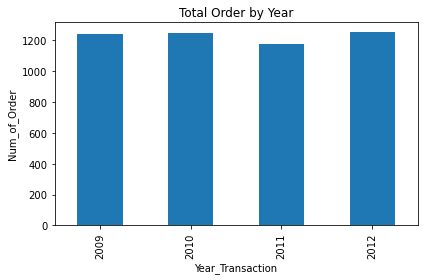

In [4]:
## Total Order

data['year_transaction'] = data['order_date'].dt.year

import matplotlib.pyplot as plt

data_year = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'])['order_status'].count()
data_year.plot(x='year_transaction',y='order_status', kind='bar', title='Total Order by Year')
plt.xlabel('Year_Transaction')
plt.ylabel('Num_of_Order')
plt.tight_layout()
plt.show()

In [5]:
# Overall Performance by Year

## Total Order
data_year1 = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'], as_index = False)['order_status'].count()
data_year1 = pd.DataFrame(data_year1)
data_year1.columns
data_year1

,year_transaction,order_status
0,2009,1244
1,2010,1248
2,2011,1178
3,2012,1254


In [6]:
data_year1.rename(columns={'year_transaction': 'year', 'order_status': 'number_of_order'}, inplace=True)
data_year1['number_of_order_lag1'] = data_year1['number_of_order'].shift(1)
data_year1['growth_of_order'] = ((data_year1['number_of_order'] / data_year1['number_of_order_lag1']) -1)*100
data_year1

,year,number_of_order,number_of_order_lag1,growth_of_order
0,2009,1244,NaN,NaN
1,2010,1248,1244.0,0.321543
2,2011,1178,1248.0,-5.608974
3,2012,1254,1178.0,6.451613


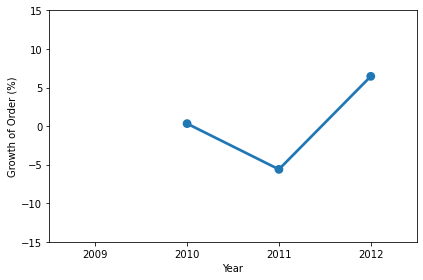

In [7]:
import seaborn as sns

sns.pointplot(data = data_year1, 
              x='year', 
              y='growth_of_order')
plt.ylim(-15,15)
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Growth of Order (%)')
plt.show()

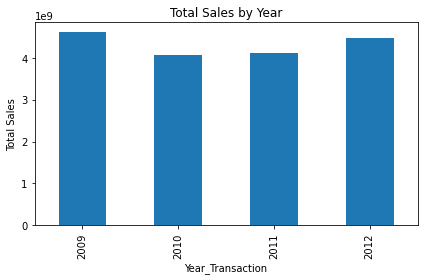

In [8]:
# Overall Performance by Year

## Total Sales
data_year = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'])['sales'].sum()
data_year.plot(x='year_transaction', y='sales', kind='bar', title='Total Sales by Year')
plt.xlabel('Year_Transaction')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [9]:
## Total Sales

data_year2 = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'], as_index=False)['sales'].sum()
data_year2 = pd.DataFrame(data_year2)
data_year2.columns

Index(['year_transaction', 'sales'], dtype='object')

In [10]:
data_year2.rename(columns={'year_transaction': 'year', 'sales': 'total_sales'}, inplace=True)
data_year2['total_sales_lag1'] = data_year2['total_sales'].shift(1)
data_year2['growth_of_sales'] = ((data_year2['total_sales'] / data_year2['total_sales_lag1']) -1)*100
data_year2

,year,total_sales,total_sales_lag1,growth_of_sales
0,2009,4613872681,NaN,NaN
1,2010,4059100607,4.613873e+09,-12.024000
2,2011,4112036186,4.059101e+09,1.304121
3,2012,4482983158,4.112036e+09,9.021005


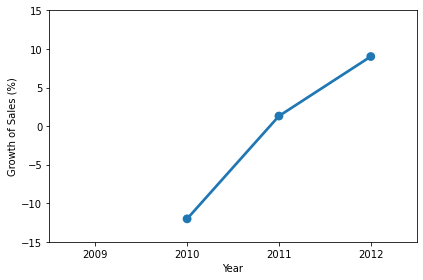

In [11]:
sns.pointplot(data = data_year2, 
              x='year', 
              y='growth_of_sales')
plt.ylim(-15,15)
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Growth of Sales (%)')
plt.show()

In [12]:
data_year = pd.merge(data_year1, data_year2, on='year', how='inner')
data_year

,year,number_of_order,number_of_order_lag1,growth_of_order,total_sales,total_sales_lag1,growth_of_sales
0,2009,1244,NaN,NaN,4613872681,NaN,NaN
1,2010,1248,1244.0,0.321543,4059100607,4.613873e+09,-12.024000
2,2011,1178,1248.0,-5.608974,4112036186,4.059101e+09,1.304121
3,2012,1254,1178.0,6.451613,4482983158,4.112036e+09,9.021005


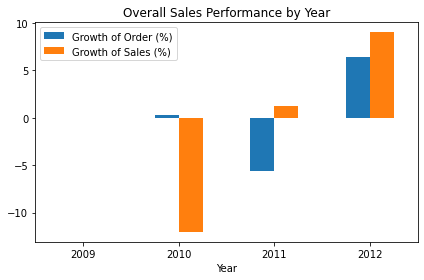

In [13]:
data_year.plot(x='year', y=['growth_of_order','growth_of_sales'], kind='bar', title='Overall Sales Performance by Year')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(['Growth of Order (%)','Growth of Sales (%)'])
plt.tight_layout()
plt.show()

### 2. Overall Performance by Product Sub Category

In [14]:
# pivot data using pivot_table

data1 = data[data['order_status'] == 'Order Finished']
data1['year_transaction'] = data1['year_transaction'].astype(str)
data_piv1 = data1.loc[(data1['year_transaction'] == '2011') | (data1['year_transaction'] == '2012')].pivot_table(
                        index='year_transaction',
                        columns=['product_sub_category'],
                        values='sales', 
                        aggfunc=sum, 
                        fill_value=0).T

data_piv1['%SalesGrowth'] = ((data_piv1['2012'] / data_piv1['2011']) -1) * 100
data_piv1.sort_values('%SalesGrowth', ascending=False, inplace=True)
data_piv1

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14040/3818788355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year_transaction'] = data1['year_transaction'].astype(str)


year_transaction,2011,2012,%SalesGrowth
product_sub_category,,,
"Scissors, Rulers and Trimmers",12638340,36776400,190.990747
Envelopes,36463900,58629280,60.787190
Office Machines,545856280,811427140,48.652158
Computer Peripherals,232677960,308014340,32.377961
Storage & Organization,285991820,356714140,24.728791
Rubber Bands,3090120,3837880,24.198413
Binders and Binder Accessories,298023200,363879200,22.097609
Paper,111080380,126896160,14.238140
Office Furnishings,160471500,178927480,11.501095


In [15]:
data_subcat1 = data_piv1.reset_index()
data_subcat1.rename(columns={'2011': 'Sales_2011', '2012': 'Sales_2012'}, inplace=True)
data_subcat1

year_transaction,product_sub_category,Sales_2011,Sales_2012,%SalesGrowth
0,"Scissors, Rulers and Trimmers",12638340,36776400,190.990747
1,Envelopes,36463900,58629280,60.787190
2,Office Machines,545856280,811427140,48.652158
3,Computer Peripherals,232677960,308014340,32.377961
4,Storage & Organization,285991820,356714140,24.728791
5,Rubber Bands,3090120,3837880,24.198413
6,Binders and Binder Accessories,298023200,363879200,22.097609
7,Paper,111080380,126896160,14.238140
8,Office Furnishings,160471500,178927480,11.501095
9,Telephones and Communication,392194658,422287514,7.672939


In [16]:
data_piv2 = data1.loc[(data1['year_transaction'] == '2011') | (data1['year_transaction'] == '2012')].pivot_table(
                        index='year_transaction',
                        columns=['product_sub_category'],
                        values=['order_status'], 
                        aggfunc={'order_status':'count'}, 
                        fill_value=0).T

data_piv2['%OrderGrowth'] = ((data_piv2['2012'] / data_piv2['2011']) -1) * 100
data_piv2.sort_values('%OrderGrowth', ascending=False, inplace=True)
data_piv2

year_transaction                             2011  2012  %OrderGrowth
             product_sub_category                                    
order_status Office Machines                   43    59     37.209302
             Computer Peripherals             106   132     24.528302
             Envelopes                         34    42     23.529412
             Storage & Organization            58    71     22.413793
             Rubber Bands                      18    22     22.222222
             Scissors, Rulers and Trimmers     19    21     10.526316
             Bookcases                         26    28      7.692308
             Telephones and Communication      92    99      7.608696
             Labels                            45    48      6.666667
             Pens & Art Supplies               78    81      3.846154
             Paper                            162   167      3.086420
             Binders and Binder Accessories   178   176     -1.123596
             Tables                            41    40     -2.439024
             Appliances                        81    79     -2.469136
             Office Furnishings               111   108     -2.702703
             Chairs & Chairmats                72    69     -4.166667
             Copiers and Fax                   14    12    -14.285714

In [17]:
data_subcat2 = data_piv2.reset_index()
data_subcat2.rename(columns={'2011': 'Order_2011', '2012': 'Order_2012'}, inplace=True)
data_subcat2

year_transaction,level_0,product_sub_category,Order_2011,Order_2012,%OrderGrowth
0,order_status,Office Machines,43,59,37.209302
1,order_status,Computer Peripherals,106,132,24.528302
2,order_status,Envelopes,34,42,23.529412
3,order_status,Storage & Organization,58,71,22.413793
4,order_status,Rubber Bands,18,22,22.222222
5,order_status,"Scissors, Rulers and Trimmers",19,21,10.526316
6,order_status,Bookcases,26,28,7.692308
7,order_status,Telephones and Communication,92,99,7.608696
8,order_status,Labels,45,48,6.666667
9,order_status,Pens & Art Supplies,78,81,3.846154


In [18]:
data_subcat = pd.merge(data_subcat1, data_subcat2, on ='product_sub_category', how='inner')
data_subcat = data_subcat.drop(data_subcat.columns[[4]], axis=1)
data_subcat

year_transaction,product_sub_category,Sales_2011,Sales_2012,%SalesGrowth,Order_2011,Order_2012,%OrderGrowth
0,"Scissors, Rulers and Trimmers",12638340,36776400,190.990747,19,21,10.526316
1,Envelopes,36463900,58629280,60.787190,34,42,23.529412
2,Office Machines,545856280,811427140,48.652158,43,59,37.209302
3,Computer Peripherals,232677960,308014340,32.377961,106,132,24.528302
4,Storage & Organization,285991820,356714140,24.728791,58,71,22.413793
5,Rubber Bands,3090120,3837880,24.198413,18,22,22.222222
6,Binders and Binder Accessories,298023200,363879200,22.097609,178,176,-1.123596
7,Paper,111080380,126896160,14.238140,162,167,3.086420
8,Office Furnishings,160471500,178927480,11.501095,111,108,-2.702703
9,Telephones and Communication,392194658,422287514,7.672939,92,99,7.608696


select year(order_date) as years, product_sub_category, sum(sales) as sales from dqlab_sales_store
where (year(order_date) between 2011 and 2012) and order_status = 'Order Finished'
group by year(order_date),product_sub_category
order by years asc, sales desc

## Promotion Effectiveness and Efficiency

### 1. Promotion Effectiveness and Efficiency by Years

In [19]:
# Calculate the burn rate of the promotion performed by overalls based on the year

"""The effectiveness and efficiency of the promotions carried out will be analyzed based on the Burn Rate, 
Burn Rate is calculated by comparing the total value of the promotions issued to the total sales obtained."""

# DQLab expected maximum burn rate is 4.5%

burn_rate_year = data[data['order_status'] == 'Order Finished'].groupby('year_transaction', 
                                                                        as_index=False)[['discount_value','sales']].sum()
burn_rate_year['burn_rate_pct'] = round(burn_rate_year['discount_value']/burn_rate_year['sales'] * 100, 2)
burn_rate_year

,year_transaction,discount_value,sales,burn_rate_pct
0,2009,214330327,4613872681,4.65
1,2010,197506939,4059100607,4.87
2,2011,214611556,4112036186,5.22
3,2012,225867642,4482983158,5.04


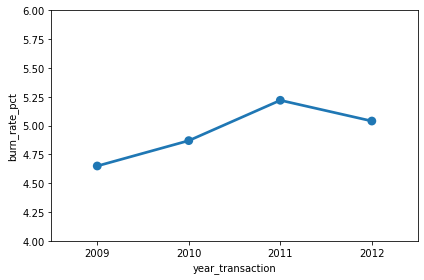

In [20]:
# visualize burn rate percentage 

import seaborn as sns

sns.pointplot(data = burn_rate_year, 
              x='year_transaction', 
              y='burn_rate_pct')
plt.ylim(4,6)
plt.tight_layout()
plt.show()

select year(order_date) as years, sum(sales) as sales, sum(discount_value) as promotion_value, round(sum(discount_value)/sum(sales) * 100, 2) as burn_rate_percentage from dqlab_sales_store
where order_status = 'Order Finished'
group by years

### 2. Promotion Effectiveness and Efficiency by Product Sub Category

In [21]:
# Calculate the burn rate of the promotion performed by overalls based on sub-category

burn_rate_sub_category = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction', 'product_sub_category'], as_index=False)[['discount_value','sales']].sum()
burn_rate_sub_category['burn_rate_pct'] = round(burn_rate_sub_category['discount_value']/burn_rate_sub_category['sales'] * 100, 2)
burn_rate_sub_category = pd.DataFrame(burn_rate_sub_category)
burn_rate_sub_category = burn_rate_sub_category.loc[burn_rate_sub_category['year_transaction'] == 2012]
burn_rate_sub_category = burn_rate_sub_category.sort_values(by ='burn_rate_pct', ascending=False)
burn_rate_sub_category


,year_transaction,product_sub_category,discount_value,sales,burn_rate_pct
64,2012,"Scissors, Rulers and Trimmers",2349280,36776400,6.39
53,2012,Bookcases,10024365,159984680,6.27
52,2012,Binders and Binder Accessories,22338980,363879200,6.14
60,2012,Office Machines,46616695,811427140,5.75
51,2012,Appliances,14393300,266131100,5.41
62,2012,Pens & Art Supplies,2343501,43818480,5.35
65,2012,Storage & Organization,18802166,356714140,5.27
55,2012,Computer Peripherals,15333293,308014340,4.98
56,2012,Copiers and Fax,14530870,292489800,4.97
61,2012,Paper,6224694,126896160,4.91


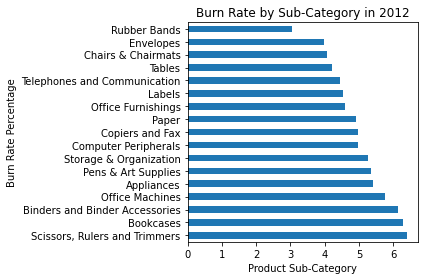

In [22]:
# plot burn rate percentage by sub category

burn_rate_sub_category.plot(x='product_sub_category', y='burn_rate_pct', kind='barh', title='Burn Rate by Sub-Category in 2012')
plt.xlabel('Product Sub-Category')
plt.ylabel('Burn Rate Percentage')
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

select year(order_date) as years, product_sub_category, product_category, sum(sales) as sales, sum(discount_value) as promotion_value, round(sum(discount_value)/sum(sales) * 100, 2) as burn_rate_percentage from dqlab_sales_store
where year(order_date) = '2012' and order_status = 'Order Finished'
group by year(order_date), product_sub_category, product_category
order by sales desc

## Customers Transactions per Year

### 1. Number of Customer who Make Transaction by Year

In [23]:
# Number of Customer who Make Transaction by Year

num_customer = data[data['order_status'] == 'Order Finished'].groupby('year_transaction', as_index=False)['customer'].nunique()
num_customer

,year_transaction,customer
0,2009,585
1,2010,593
2,2011,581
3,2012,594


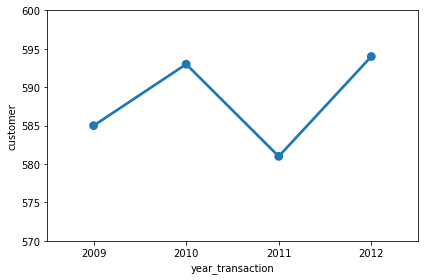

In [24]:
# Plot Number of Customer who Make Transaction by Year

sns.pointplot(data = num_customer, 
              x='year_transaction', 
              y='customer')
plt.ylim(570, 600)
plt.tight_layout()
plt.show()

select year(order_date) as years, count(distinct customer) as number_of_customer
from dqlab_sales_store
where order_status = 'Order Finished'
group by year(order_date)

### 2. Customer Aquisition per Year

In [25]:
# Number of new customers every year

customer = pd.DataFrame(data['customer'].unique())
customer.columns = ['customer']

first_year = data[data['order_status'] == 'Order Finished'].groupby('customer').year_transaction.min().reset_index()
first_year.columns = ['customer', 'first_year_as_customer']

customer = pd.merge(customer, first_year[['customer','first_year_as_customer']], on='customer')
customer

,customer,first_year_as_customer
0,Muhammed MacIntyre,2009
1,Barry French,2010
2,Clay Rozendal,2009
3,Carlos Soltero,2009
4,Carl Jackson,2010
...,...,...
770,Catherine Glotzbach,2010
771,Frank Olsen,2009
772,Alice McCarthy,2010
773,Frank Merwin,2010


In [26]:
# Number of new customers every year
customer = pd.DataFrame(customer)
customer = customer.groupby('first_year_as_customer', as_index=False)['customer'].count()
customer

,first_year_as_customer,customer
0,2009,585
1,2010,141
2,2011,38
3,2012,11


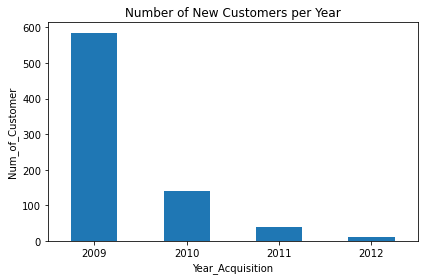

In [27]:
# Plot Number of new customers every year

customer.plot(x='first_year_as_customer', y='customer', kind='bar', title='Number of New Customers per Year')
plt.xlabel('Year_Acquisition')
plt.ylabel('Num_of_Customer')
plt.legend().set_visible(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3, Customer Retention

In [31]:
data1['year_transaction'] = data1['year_transaction'].astype(int)
data2 = data1.loc[data1['year_transaction'] == 2012]
data2['month_transaction'] = data2['order_date'].dt.month

customer_by_month = data2.groupby('customer')['month_transaction']
data2['first_transaction_month'] = customer_by_month.transform('min')
data2['lifetime'] = data2['month_transaction'] - data2['first_transaction_month']
data2

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14040/1239184740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year_transaction'] = data1['year_transaction'].astype(int)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_14040/1239184740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['month_transaction'] = data2['order_date'].dt.month
C:\Users\ASUS\AppData\Local\Temp/ipykernel_14040/1239184740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,year_transaction,month_transaction,first_transaction_month,lifetime
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,2012,10,2,8
8,868,Order Finished,Carlos Daly,2012-06-08,32,1433680,0.00,0,Office Supplies,Appliances,2012,6,6,0
9,933,Order Finished,Claudia Miner,2012-08-04,15,161220,0.02,3224,Office Supplies,Binders and Binder Accessories,2012,8,4,4
12,1154,Order Finished,Sylvia Foulston,2012-02-14,44,8924460,0.04,356978,Furniture,Bookcases,2012,2,2,0
13,1344,Order Finished,Jim Radford,2012-04-15,15,1669808,0.06,100188,Technology,Telephones and Communication,2012,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,52673,Order Finished,Jas O'Carroll,2012-05-08,14,4090132,0.07,286309,Technology,Telephones and Communication,2012,5,5,0
5476,53026,Order Finished,Eva Jacobs,2012-02-26,35,645640,0.05,32282,Office Supplies,"Scissors, Rulers and Trimmers",2012,2,1,1
5483,57152,Order Finished,Philip Brown,2012-09-03,6,45780,0.08,3662,Office Supplies,Binders and Binder Accessories,2012,9,9,0
5489,5767,Order Finished,Lisa DeCherney,2012-04-28,36,327080,0.03,9812,Office Supplies,Binders and Binder Accessories,2012,4,4,0


In [34]:
customer_by_month = data2.groupby(['first_transaction_month','lifetime'])

cohort_data = customer_by_month['customer'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='first_transaction_month',
                                 columns ='lifetime',
                                 values = 'customer')
# Printing top 5 rows of Dataframe
cohort_data

,first_transaction_month,lifetime,customer
0,1,0,95
1,1,1,14
2,1,2,20
3,1,3,17
4,1,4,12
...,...,...,...
73,10,1,5
74,10,2,2
75,11,0,18
76,11,1,3


In [36]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and rounding off.
retention = retention.round(3)*100
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_transaction_month,,,,,,,,,,,,
1,100.0,14.7,21.1,17.9,12.6,8.4,10.5,14.7,21.1,18.9,13.7,18.9
2,100.0,13.9,13.9,11.1,20.8,6.9,15.3,15.3,16.7,11.1,9.7,NaN
3,100.0,13.4,18.3,12.2,17.1,13.4,9.8,9.8,8.5,7.3,NaN,NaN
4,100.0,23.1,7.7,12.3,13.8,21.5,12.3,10.8,15.4,NaN,NaN,NaN
5,100.0,9.4,14.1,17.2,9.4,10.9,12.5,9.4,NaN,NaN,NaN,NaN
6,100.0,7.1,19.0,9.5,26.2,16.7,9.5,NaN,NaN,NaN,NaN,NaN
7,100.0,9.1,11.4,11.4,2.3,6.8,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,18.9,13.5,5.4,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,12.9,6.5,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Customer Retention Rate (%) - Monthly Cohort in 2012')

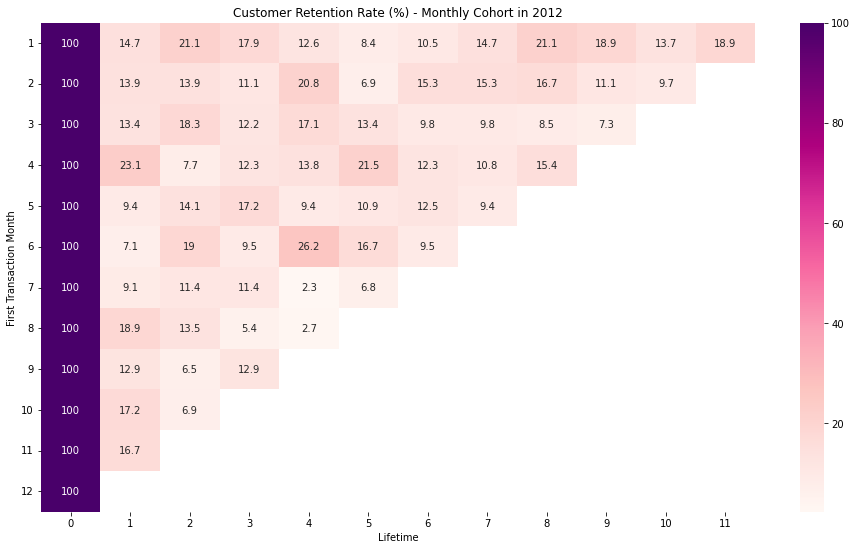

In [43]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(retention, annot=True, fmt='g', cmap='RdPu')
plt.ylabel('First Transaction Month')
plt.xlabel('Lifetime')
plt.yticks(rotation=0)
plt.title('Customer Retention Rate (%) - Monthly Cohort in 2012')